### Objective: 



The aim of this project is to build  a deep learning model so as to recognize the object by using CIFAR-10 data set ( Canadian Institute For Advanced Research)

###Importing the required

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

###Loading and splitting the data

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train[0].shape)
# 32 * 32 pixels image , rgb = 3

(32, 32, 3)


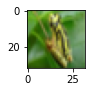

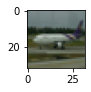

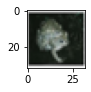

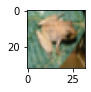

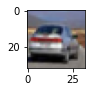

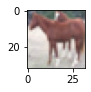

In [ ]:
#Picking random objects for display
for i in range(232, 238):
  plt.subplot(120+1+i)
  img = X_train[i]
  plt.imshow(img)
  plt.show()

### Pre Processing the Data

In [ ]:
x_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
x_test = X_test.reshape(X_test.shape[0], 32 , 32 ,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
#Normalizing by dividing by 255

n_classes = 10

# One-hot is a group of bits among which the legal combinations 
#of values are only those with a single high bit and all the others low.

print("shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print("Shape after one-hot encoding: " , y_train.shape)

shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


### Building the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

#### Convolution Layers

Convolutional Neural Networks or CNN is a type of deep neural networks that are efficient at extracting meaningful information from visual imagery.

The role of the CNN is to reduce the images into a form that is easier to process, without losing features that are critical for getting a good prediction

In [ ]:
#convolutional layers

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add (MaxPool2D(pool_size=(2,2)))

model.add (Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add (Dropout(0.25))

model.add (Flatten())


#### Hidden Layers

The dense layer is a neural network layer that is connected deeply, which means each neuron in the dense layer receives input from all neurons of its previous layer.

In [ ]:
# hidden layer

model.add (Dense (500, activation='relu'))

model.add (Dropout(0.4))

model.add (Dense (250, activation='relu'))

model.add(Dropout(0.3))

#### Output Layer
The softmax function squashes the outputs of each unit to be between 0 and 1, just like a sigmoid function. But it also divides each output such that the total sum of the outputs is equal to 1


In [ ]:
# output layer

model.add(Dense(10, activation='softmax'))

#### Compiling
Compile defines the loss function, the optimizer and the metrics.

In [ ]:
# Compiling

model.compile(loss = "categorical_crossentropy", metrics = ['accuracy'], optimizer = "adam")

#### Training the Model


In [ ]:
#Training the Model

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

model.fit(x_train, y_train, batch_size=128, epochs = 20, validation_data=(x_test, y_test))



(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)
Epoch 1/20
391/391 [==============================] - 500s 1s/step - loss: 1.6299 - accuracy: 0.4014 - val_loss: 1.2032 - val_accuracy: 0.5573
Epoch 2/20
391/391 [==============================] - 505s 1s/step - loss: 1.1306 - accuracy: 0.5966 - val_loss: 0.9323 - val_accuracy: 0.6778
Epoch 3/20
391/391 [==============================] - 501s 1s/step - loss: 0.9319 - accuracy: 0.6715 - val_loss: 0.8162 - val_accuracy: 0.7147
Epoch 4/20
391/391 [==============================] - 513s 1s/step - loss: 0.8201 - accuracy: 0.7140 - val_loss: 0.7701 - val_accuracy: 0.7354
Epoch 5/20
391/391 [==============================] - 516s 1s/step - loss: 0.7467 - accuracy: 0.7386 - val_loss: 0.7243 - val_accuracy: 0.7484
Epoch 6/20
391/391 [==============================] - 506s 1s/step - loss: 0.6729 - accuracy: 0.7648 - val_loss: 0.6984 - val_accuracy: 0.7648
Epoch 7/20
391/391 [==============================] - 505s 1s/step - loss: 0.620

### Predicting

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'dog',
         'frog',
         'horse',
         'ship',
         'truck']

In [ ]:
# Zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes,names))

In [ ]:
# Generating a patch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

In [ ]:
# Make Predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 40ms/step


In [ ]:
print(predictions)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 3.9293978e-04 4.3135130e-17 0.0000000e+00
  9.9960703e-01 6.4173209e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9557024e-38]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 

In [ ]:
for image in predictions: 
  print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[7 5 5 3 1 1 0 6 8]


### Final Object Detection

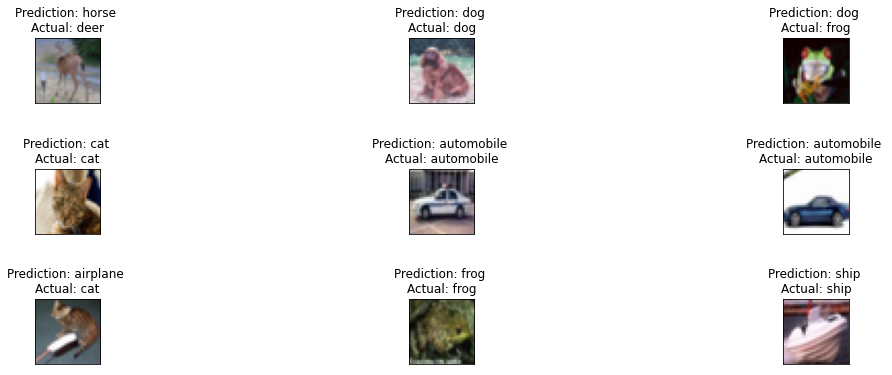

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i] == key:
      title = "Prediction: {} \nActual: {}".format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
      # Not showing the x and y axis of images


  axs[i].imshow(img)


plt.show()

### Conclusion



In conclusion, we can say that we created a Deep-Learning model that classifies objects of the CIFAR Dataset.